In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score

In [8]:
columns = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",names=columns)

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X = breast_cancer[["radius_se","concave points_worst"]].values
Y = breast_cancer['diagnosis'].values

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)


In [11]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [12]:
breast_cancer[["radius_se","concave points_worst"]].describe()

,radius_se,concave points_worst
count,569.000000,569.000000
mean,0.405172,0.114606
std,0.277313,0.065732
min,0.111500,0.000000
25%,0.232400,0.064930
50%,0.324200,0.099930
75%,0.478900,0.161400
max,2.873000,0.291000


In [13]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [15]:
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.9064327485380117
LOG LOSS: 0.21521128199037198


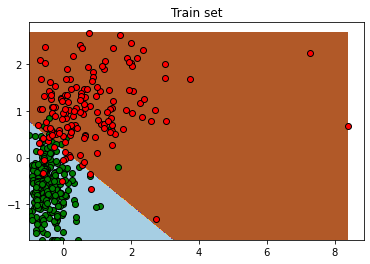

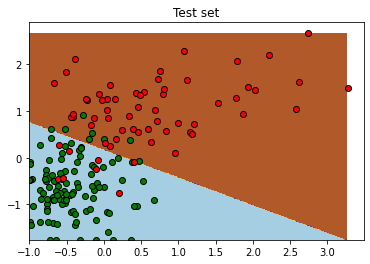

In [16]:
def showBounds(X,Y,model,title=None):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.title(title)
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='black')
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='black')
    plt.show()

    
showBounds(X_train, Y_train, lr, title="Train set")
showBounds(X_test, Y_test, lr, title="Test set")

In [17]:
X = breast_cancer.drop('diagnosis',axis=1).values
Y = breast_cancer['diagnosis'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.9649122807017544
LOG LOSS: 0.11068153613899044
